https://uqer.io/community/share/5790a091228e5b90cda2e2ea

In [1]:
import pandas as pd 

In [10]:
%matplotlib inline 

In [5]:
IndexData = pd.read_csv('IndexData.csv')

In [6]:
IndexData.head()

,tradeDate,closeIndex,CHGPct
0,2013/1/4,2276.992,0.003466
1,2013/1/7,2285.364,0.003677
2,2013/1/8,2276.070,-0.004067
3,2013/1/9,2275.340,-0.000321
4,2013/1/10,2283.658,0.003656


In [7]:
IndexData['colseIndexDiff_1'] = IndexData['closeIndex'].diff(1)  
IndexData['closeIndexDiff_2'] = IndexData['colseIndexDiff_1'].diff(1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A756898>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000AA62CC0>], dtype=object)

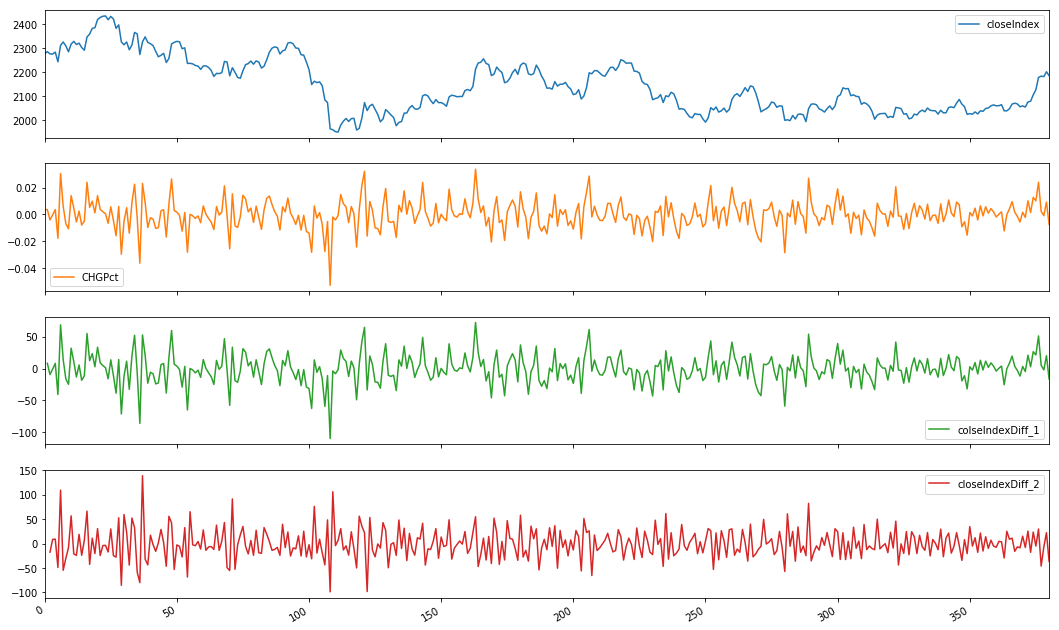

In [11]:
IndexData.plot(subplots=True,figsize=(18,12))

In [18]:
from scipy import  stats
import statsmodels.api as sm  
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = IndexData['closeIndex']  
m = 10 # 检验10个自相关系数

acf,q,p = sm.tsa.acf(data,nlags=m,qstat=True)  ## 计算自相关系数 及p-value
out = np.c_[range(1,11), acf[1:], q, p]
output=pd.DataFrame(out, columns=['lag', "AC", "Q", "P-value"])
output = output.set_index('lag')
output

,AC,Q,P-value
lag,,,
1.0,0.977190,366.688991,9.842648e-82
2.0,0.951513,715.277906,4.779432e-156
3.0,0.927073,1047.065270,1.109192e-226
4.0,0.902993,1362.675600,8.565497e-294
5.0,0.878258,1662.026278,0.000000e+00
6.0,0.857131,1947.908436,0.000000e+00
7.0,0.836825,2221.134260,0.000000e+00
8.0,0.812991,2479.709003,0.000000e+00
9.0,0.789723,2724.350491,0.000000e+00


取显著性水平为0.05，可以看出，所有的p-value都小于0.05；则我们拒绝原假设H0。
因此，我们认为该序列是序列相关的

In [16]:
data2 = IndexData['CHGPct'] # 上证指数日涨跌

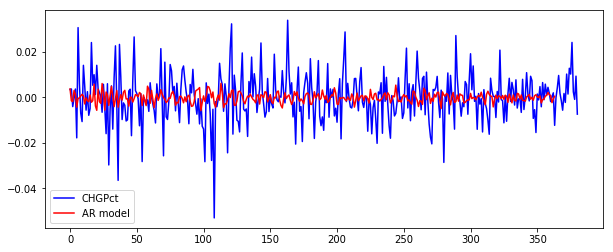

In [19]:
temp = np.array(data2) # 载入收益率序列
model = sm.tsa.AR(temp)  
results_AR = model.fit()  
plt.figure(figsize=(10,4))
plt.plot(temp,'b',label='CHGPct')
plt.plot(results_AR.fittedvalues, 'r',label='AR model')
plt.legend()

In [20]:
results_AR.params

array([-0.00015198,  0.08137558,  0.0082965 , -0.02806723,  0.01887834,
       -0.04076185, -0.08348927,  0.09559554,  0.00943705,  0.01732217,
        0.06222877, -0.02848794, -0.08591318, -0.02117853,  0.00991067,
        0.01658881, -0.02934411, -0.01915054])

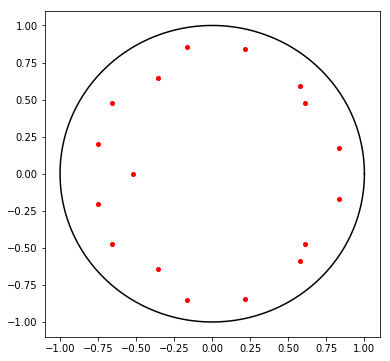

In [21]:
pi,sin,cos = np.pi,np.sin,np.cos
r1 = 1
theta = np.linspace(0,2*pi,360)
x1 = r1*cos(theta)
y1 = r1*sin(theta)
plt.figure(figsize=(6,6))
plt.plot(x1,y1,'k')  # 画单位圆
roots = 1/results_AR.roots  # 注意，这里results_AR.roots 是计算的特征方程的解，特征根应该取倒数
for i in range(len(roots)):
    plt.plot(roots[i].real,roots[i].imag,'.r',markersize=8)  #画特征根
plt.show()

所有特征根都在单位圆内，则序列为平稳的

In [27]:
aicList = []
bicList = []
hqicList = []
for i in range(1,15):  #从1阶开始算
    order = (i,0)  # 这里使用了ARMA模型，order 代表了模型的(p,q)值，我们令q始终为0，就只考虑了AR情况。
    tempModel = sm.tsa.ARMA(temp,order).fit()
    aicList.append(tempModel.aic)
    bicList.append(tempModel.bic)
    hqicList.append(tempModel.hqic)

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


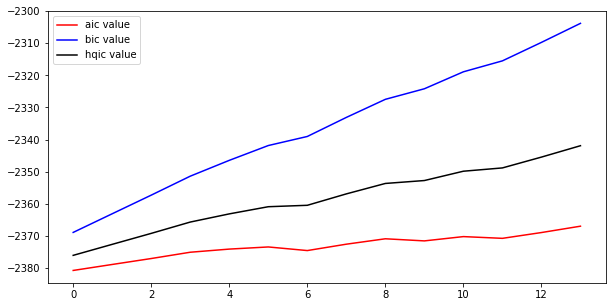

In [31]:
plt.figure(figsize=(10,5))
plt.plot(aicList,'r',label='aic value')
plt.plot(bicList,'b',label='bic value')
plt.plot(hqicList,'k',label='hqic value')
plt.legend(loc=0)

3个准则在第一点均取到最小值，也就是说，p的最佳取值应该在1？？？

## 白噪声检验

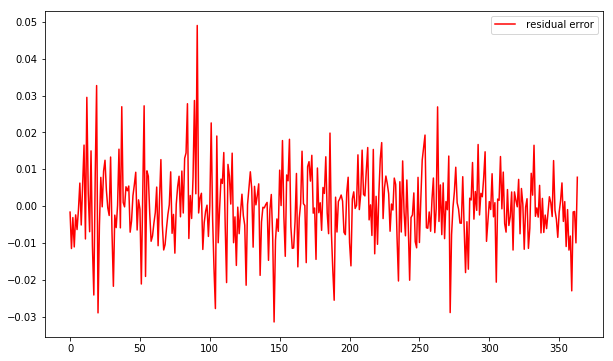

In [29]:
delta = results_AR.fittedvalues  - temp[17:]  # 残差
plt.figure(figsize=(10,6))
#plt.plot(temp[17:],label='original value')
#plt.plot(results_AR.fittedvalues,label='fitted value')
plt.plot(delta,'r',label=' residual error')
plt.legend(loc=0)

In [30]:
acf,q,p = sm.tsa.acf(delta,nlags=10,qstat=True)  ## 计算自相关系数 及p-value
out = np.c_[range(1,11), acf[1:], q, p]
output=pd.DataFrame(out, columns=['lag', "AC", "Q", "P-value"])
output = output.set_index('lag')
output

,AC,Q,P-value
lag,,,
1.0,-0.001225,0.000551,0.981277
2.0,-0.007836,0.023149,0.988492
3.0,-0.002310,0.025119,0.998949
4.0,-0.007185,0.044223,0.999759
5.0,-0.000229,0.044243,0.999978
6.0,-0.001313,0.044884,0.999998
7.0,-0.005752,0.057229,1.000000
8.0,-0.005667,0.069248,1.000000
9.0,-0.011054,0.115102,1.000000


p-value可知，该序列可以认为没有相关性，近似得可以认为残差序列接近白噪声。

## 拟合优度

In [32]:
score = 1 - delta.var()/temp[17:].var()
print score   #poor fit

0.0405231650285


## MA

order(p,q)，代表了AR和MA的阶次 建立10阶的模型作为示例

In [38]:
data = np.array(IndexData['CHGPct'])

order = (0,10)
train = data[:-10]
test = data[-10:]
tempModel = sm.tsa.ARMA(train, order).fit()

In [37]:
data.head()

0    2276.992
1    2285.364
2    2276.070
3    2275.340
4    2283.658
Name: closeIndex, dtype: float64

In [39]:
delta = tempModel.fittedvalues - train
score = 1 - delta.var()/train.var()
print score   #poor fit 

0.0278739992431


10


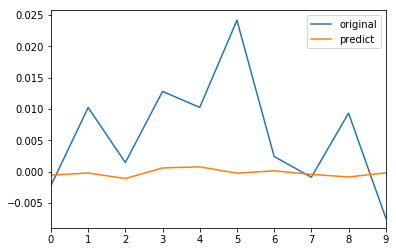

In [40]:
predicts = tempModel.predict(371, 380, dynamic=True)
print len(predicts)
comp = pd.DataFrame()
comp['original'] = test
comp['predict'] = predicts
comp.plot()

## ARMA

#### 通过观察PACF和ACF截尾，分别判断p、q的值

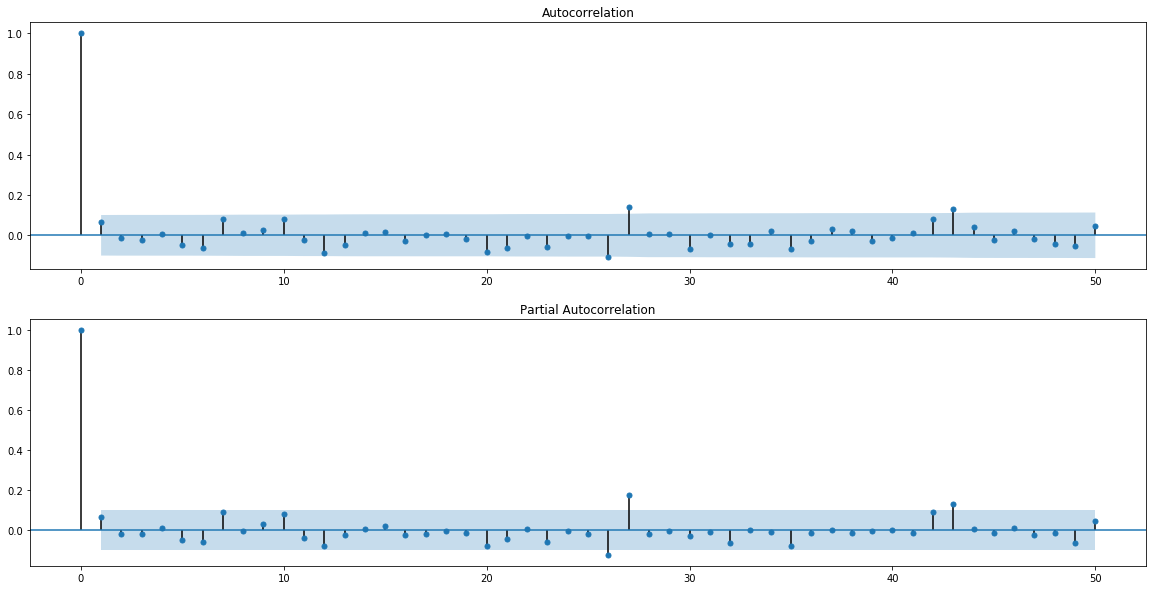

In [43]:
fig = plt.figure(figsize=(20,10))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data,lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data,lags=50,ax=ax2)

#### 信息准则定阶

In [45]:
import warnings
warnings.filterwarnings("ignore")

为了控制计算量，我们限制AR最大阶不超过6，MA最大阶不超过4

In [46]:
sm.tsa.arma_order_select_ic(data,max_ar=6,max_ma=4,ic='aic')['aic_min_order']  # AIC

(3, 3)

In [47]:
sm.tsa.arma_order_select_ic(data,max_ar=6,max_ma=4,ic='bic')['bic_min_order']  # BIC

(0, 0)

In [48]:
sm.tsa.arma_order_select_ic(data,max_ar=6,max_ma=4,ic='hqic')['hqic_min_order'] # HQIC

(0, 0)

使用AIC准则求解的模型阶次(3,3)来建立ARMA模型

In [50]:
order = (3,3)
train = data[:-10]
test = data[-10:]
tempModel = sm.tsa.ARMA(train,order).fit()

In [51]:
delta = tempModel.fittedvalues - train
score = 1 - delta.var()/train.var()
print score # Still POOR

0.0492870763744


## ARIMA

ARMA模型研究的对象为平稳序列。如果序列是非平稳的，就可以考虑使用ARIMA模型

ADF是一种常用的单位根检验方法，它的原假设为序列具有单位根，即非平稳

In [57]:
data2 = IndexData['closeIndex']

In [58]:
temp = np.array(data2)
t = sm.tsa.stattools.adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-2.30472
p-value,0.170449
Lags Used,1
Number of Observations Used,379
Critical Value(1%),-3.44772
Critical Value(5%),-2.8692
Critical Value(10%),-2.57085


p-value为0.1704489，大于显著性水平。原假设：序列具有单位根即非平稳。不能被拒绝。 因此上证指数日指数序列为非平稳的。

In [59]:
data2Diff = data2.diff()  # 差分
temp = np.array(data2Diff)[1:] # 差分后第一个值为NaN,舍去
t = sm.tsa.stattools.adfuller(temp)  # ADF检验
print "p-value:   ",t[1]

p-value:    2.31245750144e-30


p-value非常接近于0，拒绝原假设，因此，该序列为平稳的。 

In [60]:
sm.tsa.arma_order_select_ic(temp,max_ar=6,max_ma=4,ic='aic')['aic_min_order']  # AIC

(2, 2)

对差分后序列建立ARMA(2,2)模型：

In [61]:
order = (2,2)
data = np.array(data2Diff)[1:] # 差分后，第一个值为NaN
rawdata = np.array(data2)
train = data[:-10]
test = data[-10:]
model = sm.tsa.ARMA(train,order).fit()

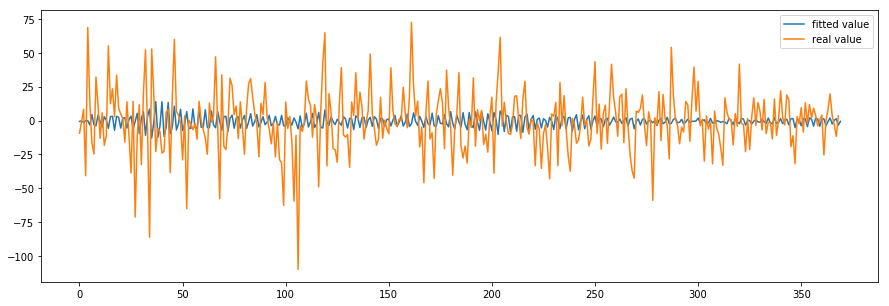

In [62]:
plt.figure(figsize=(15,5))
plt.plot(model.fittedvalues,label='fitted value')
plt.plot(train[1:],label='real value')
plt.legend(loc=0)

In [63]:
delta = model.fittedvalues - train
score = 1 - delta.var()/train[1:].var()
print score #Still Poor

0.0397489995341


## 季节模型

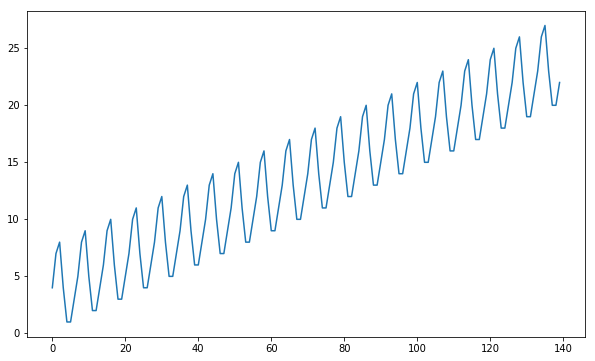

In [64]:
#https://uqer.io/community/share/57a2b906228e5b9b94a87012
T = np.array([4,7,8,4,1,1,3])
data = T
for i in range(1,20):
    x = T + i
    data = np.append(data,x)
plt.figure(figsize=(10,6))
plt.plot(data)

In [67]:
ave = data.mean()
term = len(T)
numOfTerm = len(data)/len(T)
S = []
for i in range(term):
    s = 0
    for j in range(numOfTerm):
        s += data[i+j*term]
    S.append(s/numOfTerm)
S = S/ave
S

array([ 0.96296296,  1.18518519,  1.25925926,  0.96296296,  0.74074074,
        0.74074074,  0.88888889])

In [68]:
data

array([ 4,  7,  8,  4,  1,  1,  3,  5,  8,  9,  5,  2,  2,  4,  6,  9, 10,
        6,  3,  3,  5,  7, 10, 11,  7,  4,  4,  6,  8, 11, 12,  8,  5,  5,
        7,  9, 12, 13,  9,  6,  6,  8, 10, 13, 14, 10,  7,  7,  9, 11, 14,
       15, 11,  8,  8, 10, 12, 15, 16, 12,  9,  9, 11, 13, 16, 17, 13, 10,
       10, 12, 14, 17, 18, 14, 11, 11, 13, 15, 18, 19, 15, 12, 12, 14, 16,
       19, 20, 16, 13, 13, 15, 17, 20, 21, 17, 14, 14, 16, 18, 21, 22, 18,
       15, 15, 17, 19, 22, 23, 19, 16, 16, 18, 20, 23, 24, 20, 17, 17, 19,
       21, 24, 25, 21, 18, 18, 20, 22, 25, 26, 22, 19, 19, 21, 23, 26, 27,
       23, 20, 20, 22])

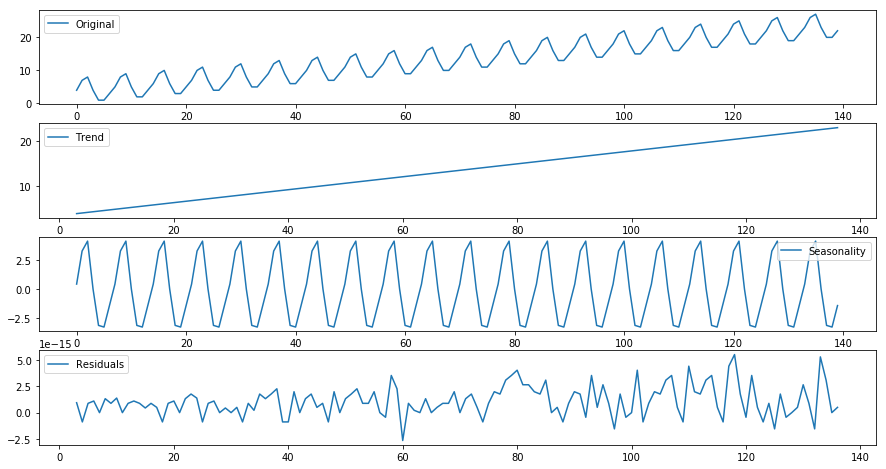

In [72]:
result = sm.tsa.seasonal_decompose(np.array(data),model='additive', freq=7) #加法模型
plt.figure(figsize=(15,8))
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc=0)
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc=0)
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc=0)
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc=0)

## ARMA and KalmanFilter

https://uqer.io/community/share/58221fb8228e5ba8f857197f  结合ARMA的卡尔曼滤波算法

In [73]:
price = pd.read_csv('price1d.txt')

In [75]:
price.head()

,closeIndex
0,3641.54
1,3641.06
2,3643.79
3,3559.26
4,3546.72


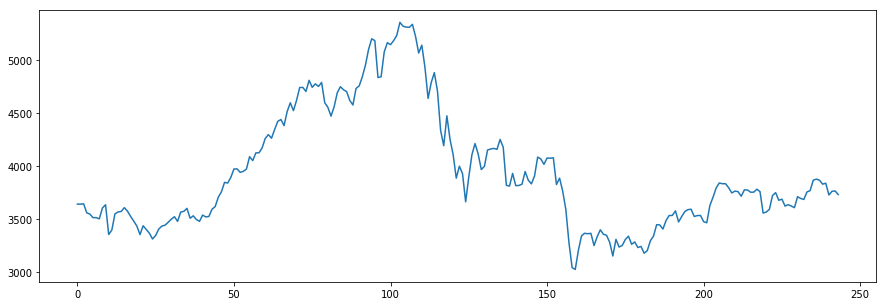

In [79]:
plt.figure(figsize=(15,5))
plt.plot(price)

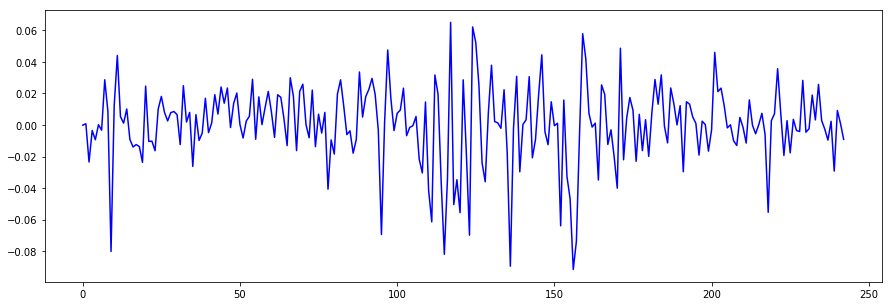

In [77]:
log_data = np.log(price)
log_return = np.array(log_data.diff()[1:])
plt.figure(figsize=(15,5))
plt.plot(log_return,'b-',label = 'log_return')

In [80]:
order = sm.tsa.arma_order_select_ic(log_return, max_ar=3, max_ma=2, ic=['aic','bic','hqic']) #定阶
print('aic-order: ',order.aic_min_order)
print('bic-order: ',order.bic_min_order)
print('hqic-order: ',order.hqic_min_order)

('aic-order: ', (3, 2))
('bic-order: ', (2, 2))
('hqic-order: ', (2, 2))


In [81]:
#bic与hqic均给出ar阶数为2，又根据前面假设：p >= q+1，故令order = (2,1)
order = (2,1)
model = sm.tsa.ARMA(log_return,order).fit()

In [82]:
#ljung-box检验（检验残差序列是否存在滞后相关）
r,q,p = sm.tsa.acf(model.resid, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0   0.001445   0.000514  0.981919
2.0   0.018604   0.086017  0.957903
3.0  -0.002257   0.087281  0.993319
4.0   0.083168   1.810291  0.770599
5.0   0.051578   2.475746  0.780143
6.0  -0.096257   4.803262  0.569283
7.0  -0.006571   4.814156  0.682631
8.0   0.140753   9.833167  0.276931
9.0  -0.024261   9.982924  0.351869
10.0 -0.102196  12.651513  0.243814
11.0 -0.115023  16.046617  0.139409
12.0  0.072519  17.402009  0.135091
13.0  0.111749  20.634468  0.080480
14.0 -0.075784  22.127560  0.076031
15.0 -0.005699  22.136041  0.104286
16.0  0.097924  24.650971  0.076219
17.0  0.015494  24.714208  0.101292
18.0 -0.015431  24.777215  0.131177
19.0 -0.010720  24.807758  0.166968
20.0  0.114529  28.309621  0.102270
21.0  0.162292  35.373035  0.025685
22.0 -0.043516  35.883151  0.031253
23.0 -0.100108  38.595148  0.021967
24.0 -0.004346  38.600283  0.030065
25.0  0.055228  39.433265  0.033317
26.0 -0.130744  44.123079  0

通过ljung-box检验，判断残差序列是否存在滞后相关。得到滞后20阶以内的p-value均大于0.05，故可以判断残差中没有显著的序列相关性，可以进行下一步分析。

将ARMA转化为状态空间模型主要有Akaike、Harvey、Aoki三种方法

In [84]:
print(model.summary())
print('------------------------------------------------')
print('params: ',model.params)      #ARMA模型得到的参数
print('pvalues: ',model.pvalues)    #ARMA模型得到的参数的p-value。下面的程序中，将p-value > 0.05（即不显著）的参数忽略。

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  243
Model:                     ARMA(2, 1)   Log Likelihood                 558.170
Method:                       css-mle   S.D. of innovations              0.024
Date:                Thu, 11 Jan 2018   AIC                          -1106.340
Time:                        10:24:28   BIC                          -1088.875
Sample:                             0   HQIC                         -1099.306
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.956e-05      0.002      0.066      0.948      -0.003       0.003
ar.L1.y        0.1152      0.229      0.502      0.616      -0.335       0.565
ar.L2.y       -0.1868      0.070     -2.683      0.0

### Harvey方法的算法实现部分

In [88]:
import math

In [89]:
#得到观测值y（满足均值为0的ARMA过程）
y = np.zeros(len(log_return))
if model.pvalues[0] < 0.05:
    y = np.array(log_return - model.params[0])      #如果拟合的ARMA模型中常数项显著不为0，则将其减去
else:
    y = np.array(log_return)
    
#T矩阵
T = np.zeros((order[0],order[0]))
phi = []
for i in range(1,order[0]+1):
    if model.pvalues[i] < 0.05:
        phi.append(model.params[i])     #将p-value > 0.05（即不显著）的参数忽略
    else:
        phi.append(0)
T[:,0] = phi     #得到T矩阵第一列
for i in range(1,order[0]):
    T[i-1,i] = 1
T = np.mat(T)    #得到T矩阵
print('T: ',T)

#R矩阵
R = np.zeros((order[0],1))
R[0] = 1
for i in range(order[0]+1,len(model.params)):
    if model.pvalues[i] < 0.05:
        R[i - order[0]] = model.params[i]
R = np.mat(R)
print('R: ',R)    #得到R矩阵
theta = R[1:]

#Z矩阵
Z = np.zeros(order[0])
Z[0] = 1
Z = np.mat(Z)     #得到Z矩阵
print('Z: ',Z)

#得到Q
Q = math.sqrt(model.sigma2)
print('Q: ',Q)

('T: ', matrix([[ 0.        ,  1.        ],
        [-0.18677785,  0.        ]]))
('R: ', matrix([[ 1.],
        [ 0.]]))
('Z: ', matrix([[ 1.,  0.]]))
('Q: ', 0.024328066250814944)


### 卡尔曼滤波预测的算法实现部分

In [90]:
#得到初始化的sigma矩阵
a = Q * np.random.randn(len(y))        #标准差为Q的白噪声序列
s = np.zeros((len(y) - order[0],1))    #需要用到t-m时间的数值，故忽略前m个时间
s = y[order[0]:]
for i in range(1,order[0]):
    ar = np.zeros((len(y) - order[0],1))
    ma = np.zeros((len(y) - order[0],1))
    for j in range(i,order[0]):
        ar = ar + (phi[j] * y[order[0] + i - (j+1): len(y) + i - (j+1)]).reshape(len(y)-order[0],1)
        ma = ma + (theta[j-1] * a[order[0] + i - j: len(a) + i - j]).reshape(len(y)-order[0],1)
    s = np.hstack([s,ar+ma])
sigma = np.cov(s.T)
sigma = np.mat(sigma)
print('sigma: ',sigma)

('sigma: ', matrix([[  6.33157830e-04,  -1.53063957e-05],
        [ -1.53063957e-05,   2.20759831e-05]]))


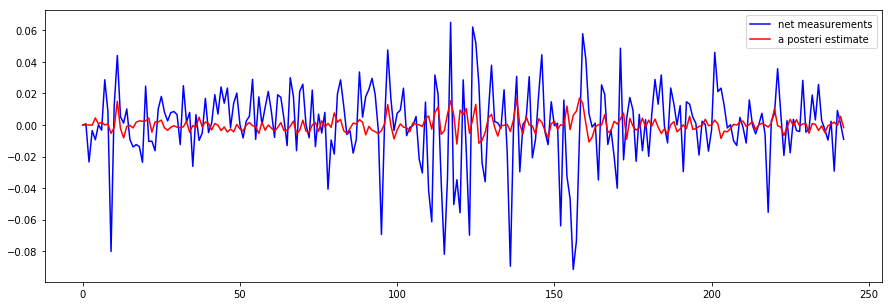

In [91]:
#kalman
#初始化
v = np.zeros(len(y))
xhat = np.mat(np.zeros((order[0],1)))
#迭代过程
for t in range(1,len(y)):
    v[t] = y[t-1] - Z * xhat[:,t-1]
    V = Z * sigma * Z.T
    K = T * sigma * Z.T * np.linalg.inv(V)
    L = T - K * Z
    xhat = np.hstack([xhat,T * xhat[:,t-1] + K * v[t]])
    sigma = T * sigma * L.T + R * Q * R.T

plt.figure(figsize=(15,5))
plt.plot(y,'b-',label = 'net measurements')     #测量值
plt.plot(xhat.getA()[0],'r-',label = 'a posteri estimate')   #过滤后的值
plt.legend()

## 自回归条件异方差模型(ARCH)

https://uqer.io/community/share/57aac592228e5b9b95a88999

ARCH模型将当前一切可利用信息作为条件，并采用某种自回归形式来刻划方差的变异，对于一个时间序列而言，在不同时刻可利用的信息不同，而相应的条件方差也不同，利用ARCH 模型，可以刻划出随时间而变异的条件方差。

In [95]:
from scipy import  stats
import statsmodels.api as sm  # 统计相关的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arch  # 条件异方差模型相关的库

In [103]:
arch_data = pd.read_csv('ARCH.txt')

In [105]:
arch_data.head()

,CHGPct
0,-0.003115
1,-0.012445
2,-0.017967
3,0.000786
4,-0.001454


In [109]:
data = np.array(arch_data['CHGPct'])

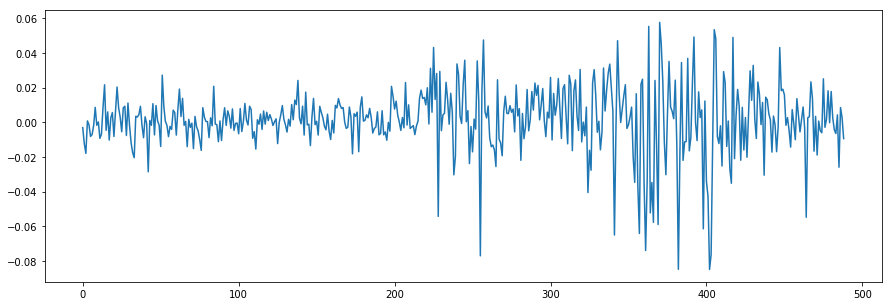

In [110]:
plt.figure(figsize=(15,5))
plt.plot(data)

In [111]:
#首先检验平稳性，是否需要差分。 原假设H0：序列为非平稳的，备择假设H1:序列是平稳的
t = sm.tsa.stattools.adfuller(data)  # ADF检验
print "p-value:   ",t[1]

p-value:    7.55775720826e-10


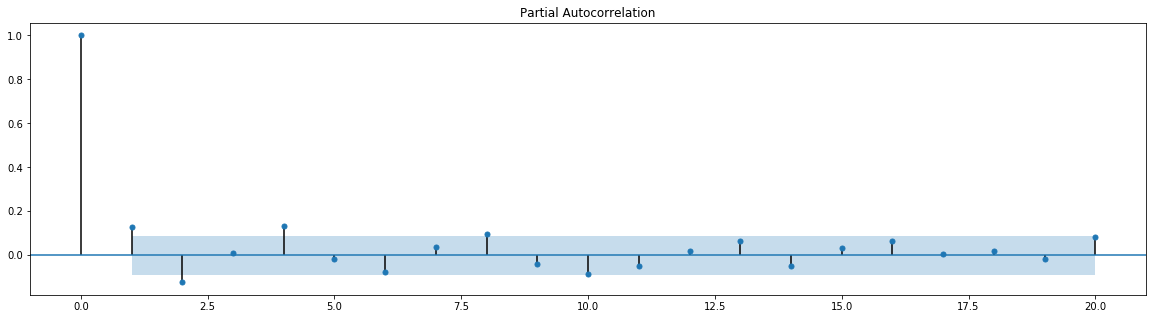

In [112]:
fig = plt.figure(figsize=(20,5))
ax1=fig.add_subplot(111)
fig = sm.graphics.tsa.plot_pacf(data,lags = 20,ax=ax1)

#### 建立AR(8)模型，即均值方程

In [113]:
order = (8,0)
model = sm.tsa.ARMA(data,order).fit()

### ARCH效应的检验

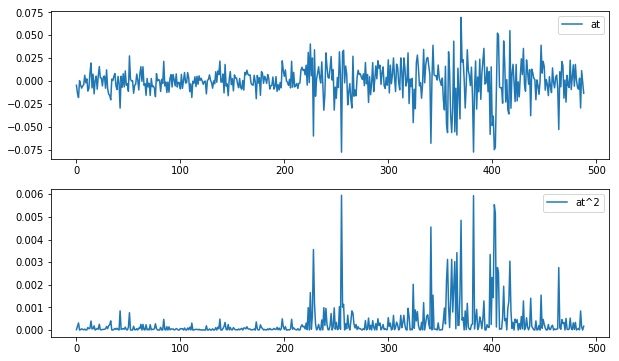

In [114]:
at = data -  model.fittedvalues
at2 = np.square(at)
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(at,label = 'at')
plt.legend()
plt.subplot(212)
plt.plot(at2,label='at^2')
plt.legend(loc=0)

对{at^2}序列进行混成检验： 原假设H0:序列没有相关性，备择假设H1：序列具有相关性

In [115]:
m = 25 # 我们检验25个自相关系数
acf,q,p = sm.tsa.acf(at2,nlags=m,qstat=True)  ## 计算自相关系数 及p-value
out = np.c_[range(1,26), acf[1:], q, p]
output=pd.DataFrame(out, columns=['lag', "AC", "Q", "P-value"])
output = output.set_index('lag')
output

,AC,Q,P-value
lag,,,
1.0,0.239755,28.281698,1.048830e-07
2.0,0.255332,60.423713,7.571073e-14
3.0,0.228797,86.285229,1.374857e-18
4.0,0.219143,110.059387,7.068479e-23
5.0,0.168783,124.191329,4.060685e-25
6.0,0.161525,137.160866,3.980433e-27
7.0,0.137504,146.579235,2.121367e-28
8.0,0.105541,152.139401,7.015679e-29
9.0,0.106755,157.840040,2.086519e-29


p-value小于显著性水平0.05，我们拒绝原假设，即认为序列具有相关性。因此具有ARCH效应。

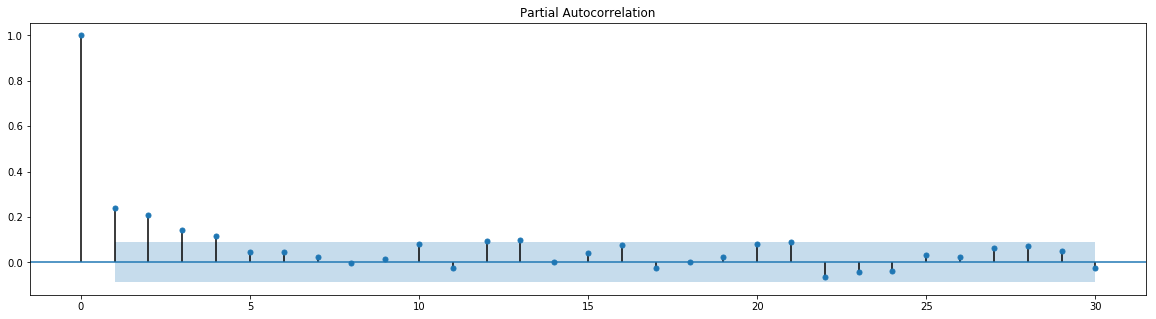

In [116]:
fig = plt.figure(figsize=(20,5))
ax1=fig.add_subplot(111)
fig = sm.graphics.tsa.plot_pacf(at2,lags = 30,ax=ax1)

In [117]:
#粗略选择均值模型为AR(8)模型，波动率模型选择ARCH(4)模型
train = data[:-10]
test = data[-10:]
am = arch.arch_model(train,mean='AR', lags=8, vol='ARCH',  p=4) 
res = am.fit()

Iteration:      1,   Func. Count:     16,   Neg. LLF: -1272.93928172
Iteration:      2,   Func. Count:     39,   Neg. LLF: -1273.03240265
Iteration:      3,   Func. Count:     59,   Neg. LLF: -1279.82062867
Iteration:      4,   Func. Count:     78,   Neg. LLF: -1279.96834966
Iteration:      5,   Func. Count:     97,   Neg. LLF: -1280.04197824
Iteration:      6,   Func. Count:    120,   Neg. LLF: -1280.04269969
Iteration:      7,   Func. Count:    139,   Neg. LLF: -1280.17883139
Iteration:      8,   Func. Count:    162,   Neg. LLF: -1280.18327068
Iteration:      9,   Func. Count:    183,   Neg. LLF: -1280.18422434
Iteration:     10,   Func. Count:    204,   Neg. LLF: -1280.18610917
Iteration:     11,   Func. Count:    222,   Neg. LLF: -1280.477543
Iteration:     12,   Func. Count:    245,   Neg. LLF: -1280.50780854
Iteration:     13,   Func. Count:    264,   Neg. LLF: -1280.58715691
Iteration:     14,   Func. Count:    283,   Neg. LLF: -1280.6076755
Positive directional derivative for l

C:\ProgramData\Anaconda2\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


In [121]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - ARCH Model Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.042
Mean Model:                        AR   Adj. R-squared:                  0.025
Vol Model:                       ARCH   Log-Likelihood:                1280.61
Distribution:                  Normal   AIC:                          -2533.22
Method:            Maximum Likelihood   BIC:                          -2475.05
                                        No. Observations:                  471
Date:                Thu, Jan 11 2018   Df Residuals:                      457
Time:                        10:56:41   Df Model:                           14
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const      1.7107e-03  6.411e-04      2.668  7.619e-03 [4.542e-04,2.967e-03]
y[1]           0.1190  5.745e-02      2.072  3.828e-02   [6.429e-03,  0.232]
y[2]          -0.1210  6.619e-02     -1.828  6.762e-02   [ -0.251,8.767e-03]
y[3]          -0.0692  6.542e-02     -1.058      0.290   [ -0.197,5.902e-02]
y[4]           0.0563  9.344e-02      0.603      0.547     [ -0.127,  0.239]
y[5]           0.0263  6.421e-02      0.409      0.683  [-9.958e-02,  0.152]
y[6]          -0.0835  7.271e-02     -1.149      0.251   [ -0.226,5.896e-02]
y[7]          -0.0652  6.551e-02     -0.995      0.320   [ -0.194,6.322e-02]
y[8]           0.0272  5.617e-02      0.485      0.628  [-8.286e-02,  0.137]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.0803e-04  3.922e-05      2.755  5.874e-03 [3.117e-05,1.849e-04]
alpha[1]       0.1705      0.168      1.012      0.311     [ -0.160,  0.501]
alpha[2]       0.1961  8.995e-02      2.181  2.922e-02   [1.984e-02,  0.372]
alpha[3]       0.1705      0.121      1.412      0.158  [-6.618e-02,  0.407]
alpha[4]       0.1705      0.148      1.149      0.250     [ -0.120,  0.461]
============================================================================

Covariance estimator: robust

WARNING: The optimizer did not indicate successful convergence. The message was
Positive directional derivative for linesearch. See convergence_flag.
"""

## GARCH

虽然ARCH模型简单，但为了充分刻画收益率的波动率过程，往往需要很多参数，例如上面用到ARCH(4)模型，有时会有更高的ARCH(m)模型。因此，Bollerslev(1986)年提出了一个推广形式，称为广义的ARCH模型（GARCH）

In [129]:
train = data[:-10]
test = data[-10:]
am = arch.arch_model(train,mean='AR',lags=8,vol='GARCH') 
res = am.fit()

Iteration:      1,   Func. Count:     14,   Neg. LLF: -1302.57821102
Iteration:      2,   Func. Count:     35,   Neg. LLF: -1302.57893457
Iteration:      3,   Func. Count:     55,   Neg. LLF: -1302.5812305
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1302.5812315
            Iterations: 4
            Function evaluations: 66
            Gradient evaluations: 3


In [130]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                      y   R-squared:                       0.068
Mean Model:                        AR   Adj. R-squared:                  0.052
Vol Model:                      GARCH   Log-Likelihood:                1302.58
Distribution:                  Normal   AIC:                          -2581.16
Method:            Maximum Likelihood   BIC:                          -2531.30
                                        No. Observations:                  471
Date:                Thu, Jan 11 2018   Df Residuals:                      459
Time:                        11:09:17   Df Model:                           12
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const       1.0872e-03  5.677e-04      1.915  5.547e-02 [-2.542e-05,2.200e-03]
y[1]            0.1486  4.337e-02      3.426  6.125e-04    [6.358e-02,  0.234]
y[2]           -0.0925  5.736e-02     -1.613      0.107    [ -0.205,1.993e-02]
y[3]           -0.0205  5.562e-02     -0.369      0.712    [ -0.130,8.848e-02]
y[4]            0.1180  5.114e-02      2.308  2.101e-02    [1.779e-02,  0.218]
y[5]       -9.7737e-05  4.715e-02 -2.073e-03      0.998 [-9.252e-02,9.232e-02]
y[6]           -0.0751  4.621e-02     -1.624      0.104    [ -0.166,1.551e-02]
y[7]            0.0268  4.503e-02      0.596      0.551   [-6.143e-02,  0.115]
y[8]            0.0973  4.725e-02      2.059  3.948e-02    [4.684e-03,  0.190]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      6.8221e-06  2.605e-11  2.618e+05      0.000 [6.822e-06,6.822e-06]
alpha[1]       0.1000  2.238e-02      4.468  7.913e-06   [5.613e-02,  0.144]
beta[1]        0.8800  1.996e-02     44.096      0.000     [  0.841,  0.919]
============================================================================

Covariance estimator: robust
"""

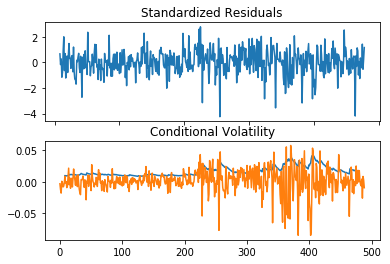

In [133]:
res.plot()
plt.plot(data)

观察上图，第一张图为标准化残差，近似平稳序列，说明模型在一定程度上是正确的； 

第二张图，橙色为原始收益率序列、蓝色为条件异方差序列，可以发现条件异方差很好得表现出了波动率。

In [135]:
#提取均值方程的系数向量w，再逐个计算at后面10个值
ini = res.resid[-8:]
a = np.array(res.params[1:9])
w = a[::-1] # 系数
for i in range(10):
    new = test[i] - (res.params[0] + w.dot(ini[-8:]))
    ini = np.append(ini,new)
print len(ini)
at_pre = ini[-10:]
at_pre2 = at_pre**2
at_pre2

18


array([  2.37473743e-05,   3.67853110e-04,   1.58548374e-07,
         4.22110333e-05,   5.30998224e-05,   1.25447165e-05,
         8.78546650e-04,   1.57694162e-04,   4.87428381e-06,
         1.54236416e-04])

In [136]:
ini2 = res.conditional_volatility[-2:] #上两个条件异方差值

for i in range(10):
    new = 0.000007 + 0.1*at_pre2[i] + 0.88*ini2[-1]
    ini2 = np.append(ini2,new)
vol_pre = ini2[-10:]
vol_pre

array([ 0.01371288,  0.01211112,  0.0106648 ,  0.00939625,  0.00828101,
        0.00729554,  0.00651493,  0.00575591,  0.00507269,  0.00448639])

将原始数据、条件异方差拟合数据及预测数据一起画出来，分析波动率预测情况

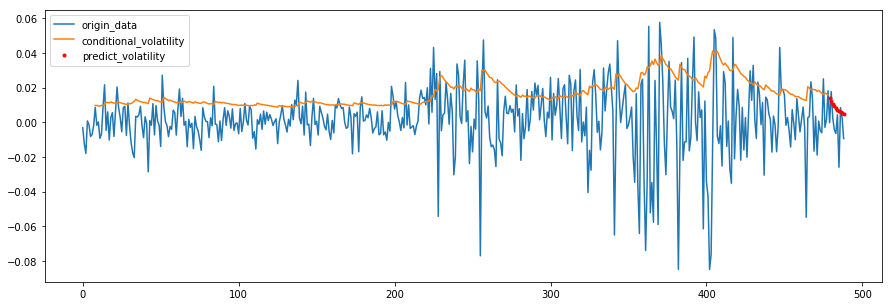

In [137]:
plt.figure(figsize=(15,5))
plt.plot(data,label='origin_data')
plt.plot(res.conditional_volatility,label='conditional_volatility')
x=range(479,489)
plt.plot(x,vol_pre,'.r',label='predict_volatility')
plt.legend(loc=0)